In [ ]:
# PCA + KNN dataset handled.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
dataset_path = 'dataset'

paths = [f"{dataset_path}/s" + str(i) for i in range(1, 41)]
print(f"Paths: {paths}")  # This will print the paths
print(f"Length of paths: {len(paths)}")
cnt = 0
Data = np.zeros((400, 10304))
labels = np.zeros((400, 1))
for i in range(40):
    labels[i * 10 : (i + 1) * 10] = i + 1
for path in paths:
    files = os.listdir(path)
    for file in files:
        img = Image.open(path + "/" + file)
        np_img = np.array(img)
        np_img = np_img.flatten()
        Data[cnt] = np_img
        cnt += 1
        
print(len(paths))

Paths: ['dataset/s1', 'dataset/s2', 'dataset/s3', 'dataset/s4', 'dataset/s5', 'dataset/s6', 'dataset/s7', 'dataset/s8', 'dataset/s9', 'dataset/s10', 'dataset/s11', 'dataset/s12', 'dataset/s13', 'dataset/s14', 'dataset/s15', 'dataset/s16', 'dataset/s17', 'dataset/s18', 'dataset/s19', 'dataset/s20', 'dataset/s21', 'dataset/s22', 'dataset/s23', 'dataset/s24', 'dataset/s25', 'dataset/s26', 'dataset/s27', 'dataset/s28', 'dataset/s29', 'dataset/s30', 'dataset/s31', 'dataset/s32', 'dataset/s33', 'dataset/s34', 'dataset/s35', 'dataset/s36', 'dataset/s37', 'dataset/s38', 'dataset/s39', 'dataset/s40']
Length of paths: 40
40


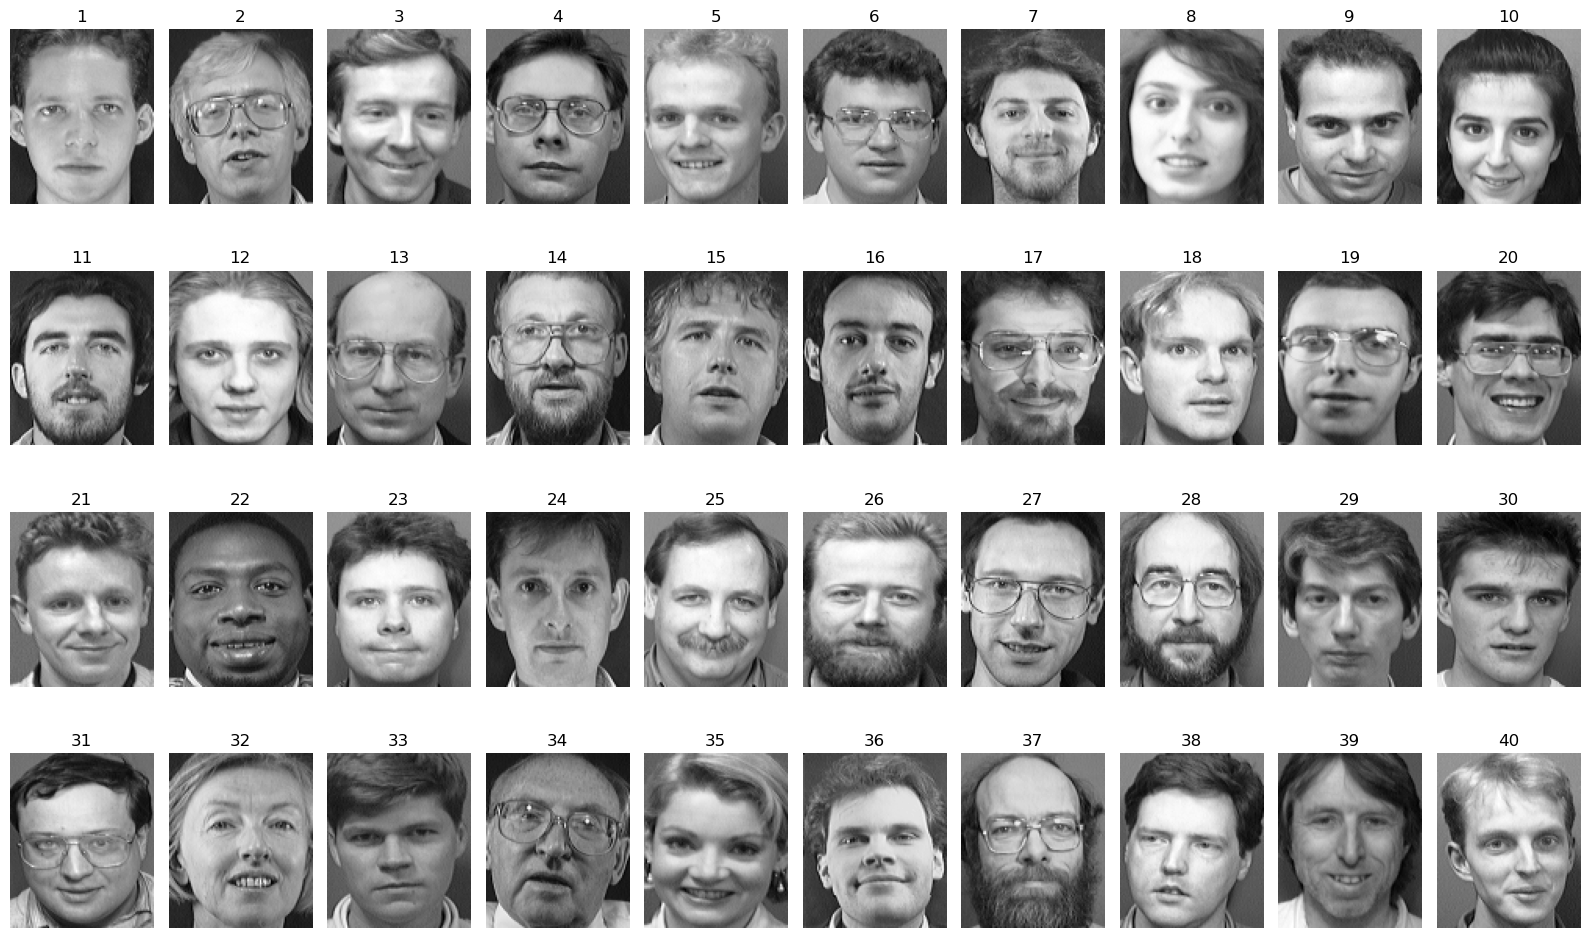

In [4]:
image_height = 112
image_width = 92

fig, axs = plt.subplots(4, 10, figsize=(16, 10))

# Flatten the array of axes
axs = axs.ravel()

for i in range(40):
    image_array = np.reshape(Data[(i) * 10], (image_height, image_width))
    axs[i].imshow(image_array, cmap="gray")
    axs[i].set_title(i + 1)
    axs[i].axis("off")

plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and temp (validation + test) sets
X_temp, X_train, y_temp, y_train = train_test_split(Data, labels, test_size=0.6, stratify=labels, random_state=42)

# Split the temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(240, 10304) (80, 10304) (80, 10304)
(240, 1) (80, 1) (80, 1)


In [7]:
def get_PCA(training_data, alpha):
    # Compute the mean of the training data
    mean_face = np.mean(training_data, axis=0)
    # subtract the mean from the training data
    training_data_centralized = training_data - mean_face
    # compute the covariance matrix
    cov_matrix = training_data_centralized @ training_data_centralized.T
    # compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    # sort the eigenvectors descindigly by eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    # restore the original eigenvectors
    eigenvectors_converted = training_data_centralized.T @ eigenvectors
    # normalize the eigenvectors_converted
    eigenfaces = eigenvectors_converted / np.linalg.norm(eigenvectors_converted, axis=0)
    # compute the number of components to keep
    sum = 0
    no_components = 0
    for i in range(len(eigenvalues)):
        sum += eigenvalues[i]
        no_components += 1
        if sum / np.sum(eigenvalues) >= alpha:
            break
    # project the training data on the eigenfaces
    return mean_face, eigenfaces[:, :no_components]


mean_face, eigenfaces = get_PCA(X_train, 0.8)
print(eigenfaces.shape)

(10304, 38)


In [8]:
_, eigenfaces = get_PCA(X_train, 0.95)

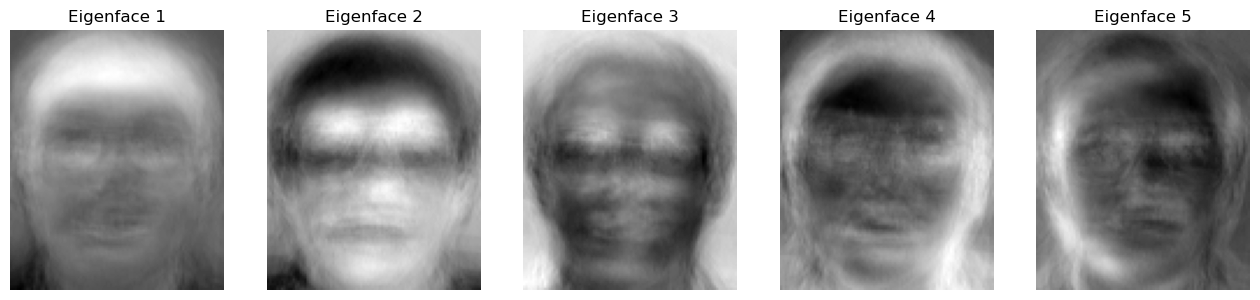

In [9]:
fig, axs = plt.subplots(1, 5, figsize=(16, 10))
for i in range(5):
    image_array = np.reshape(eigenfaces[:, i], (image_height, image_width))
    axs[i].imshow(image_array, cmap="gray")
    axs[i].set_title("Eigenface " + str(i + 1))
    axs[i].axis("off")
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def Test_PCA(training_data, testing_data, training_labels, testing_labels, alpha, k):
    mean_face, eigenfaces = get_PCA(training_data, alpha)
    X_train_pca, X_test_pca = PCA_Projected_data(training_data, testing_data, mean_face, eigenfaces)
    knn = KNeighborsClassifier(k, weights="distance")
    knn.fit(X_train_pca, training_labels.ravel())
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(testing_labels, y_pred.ravel())
    f1 = f1_score(testing_labels, y_pred.ravel(), average='weighted')
    recall = recall_score(testing_labels, y_pred.ravel(), average='weighted')
    precision = precision_score(testing_labels, y_pred.ravel(), average='weighted')
    return accuracy, f1, recall, precision

In [13]:
def PCA_Projected_data(training_data,testing_data,mean_face, eigenfaces):
    X_train_centered = training_data - mean_face
    X_train_projected = X_train_centered @ eigenfaces
    X_test_centered = testing_data - mean_face
    X_test_projected = X_test_centered @ eigenfaces
    return X_train_projected, X_test_projected

In [15]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier

def Test_PCA(training_data, testing_data, training_labels, testing_labels, alpha, k):
    mean_face, eigenfaces = get_PCA(training_data, alpha)
    X_train_pca, X_test_pca = PCA_Projected_data(training_data, testing_data, mean_face, eigenfaces)
    knn = KNeighborsClassifier(k, weights="distance")
    knn.fit(X_train_pca, training_labels.ravel())
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(testing_labels, y_pred.ravel())
    f1 = f1_score(testing_labels, y_pred.ravel(), average='weighted')
    recall = recall_score(testing_labels, y_pred.ravel(), average='weighted')
    precision = precision_score(testing_labels, y_pred.ravel(), average='weighted')
    return accuracy, f1, recall, precision

# Run the Test_PCA function with k=5
accuracy, f1, recall, precision = Test_PCA(X_train, X_test, y_train, y_test, alpha=0.95, k=5)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.925
F1 Score: 0.9242857142857142
Recall: 0.925
Precision: 0.96
